In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [84]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X,y = make_blobs(n_samples=2000, 
                 centers = blob_centers,
                 cluster_std = blob_std,
                 random_state=123)

kmeans_c = KMeans(n_clusters=5, random_state=123)
y_predict = kmeans_c.fit_predict(X)

print(y_predict)
print(y_predict is kmeans_c.labels_)
print(kmeans_c.cluster_centers_)
print(kmeans_c.labels_)

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans_c.predict(X_new)

[0 2 1 ... 1 1 1]
True
[[ 0.22211271  2.29488501]
 [-2.80240931  1.80817477]
 [-1.45400251  2.28240421]
 [-2.7979204   2.80239567]
 [-2.79959856  1.30967879]]
[0 2 1 ... 1 1 1]


array([0, 0, 3, 3], dtype=int32)

In [35]:
# K means



[0 2 1 ... 1 1 1]
True
[[ 0.22211271  2.29488501]
 [-2.80240931  1.80817477]
 [-1.45400251  2.28240421]
 [-2.7979204   2.80239567]
 [-2.79959856  1.30967879]]
[0 2 1 ... 1 1 1]


array([0, 0, 3, 3], dtype=int32)

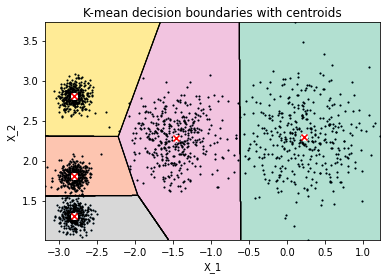

In [85]:
def plotCluster(X,y=None):
  plt.scatter(X[:,0],X[:,1],c=y, s=1)
  plt.xlabel("X_1")
  plt.ylabel("X_2")
  
def plotCentroid(center):
  plt.scatter(center[:,0], center[:,1],marker="o",color="w")
  plt.scatter(center[:,0], center[:,1],marker="x",color="r")

def plotDecisionBoundaries(model,X,title):
  plotCluster(X)
  mins = X.min(axis=0)
  maxs = X.max(axis=0)
  xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],1000), np.linspace(mins[1],maxs[1],1000))
  ravel = np.c_[xx.ravel(),yy.ravel()]
  z = model.predict(ravel)
  z = z.reshape(xx.shape)
  plt.contourf(z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Set2", alpha=0.5)
  plt.contour(z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
  plotCluster(X,"k")
  plotCentroid(model.cluster_centers_)
  plt.title(title)

plotDecisionBoundaries(kmeans_c,X,"K-mean decision boundaries with centroids")

In [69]:
kmeans_c.cluster_centers_

array([[ 0.22211271,  2.29488501],
       [-2.80240931,  1.80817477],
       [-1.45400251,  2.28240421],
       [-2.7979204 ,  2.80239567],
       [-2.79959856,  1.30967879]])